#**EE769 Introduction to Machine Learning**

#Programming Assignment – 3 : Deep Learning and Unsupervised Learning


**Name:** Prafull Pratap Bhosale

**Roll No.** 203010005


**Name:** Ojaswini Bhardwaj

**Roll No.** 213300011


# Q4: Non-linear dimension reduction (Kernel PCA)

<a id="2"></a>
# Imports:

In [ ]:
#Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

<a id="3"></a>
# Read the data from URL

In [ ]:
#df is our original DataFrame
df = pd.read_csv("https://www.ee.iitb.ac.in/~asethi/Dump/DataKPCA.csv")

In [ ]:
display(df)

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540
...,...,...,...,...,...,...,...
185,2.647090,14.246231,-44.947807,-10.412540,-2.809695,2.084152,1.903990
186,2.677908,14.620351,-45.776334,-10.196029,-2.640178,2.038005,1.910832
187,3.543866,14.487241,-49.692284,-7.773038,-1.865513,1.752195,1.952922
188,3.563404,13.945495,-49.131439,-8.156546,-2.104684,1.773425,1.914397


<a id="4"></a>
# Exploration/Engineering:

First, we construct a new DataFrame, `X` that we can modify. `X` will begin as a 'copy' of the original DataFrame, `df`.

In [ ]:
X = df.copy()

Any missing values?

In [ ]:
X.isnull().sum()

x1    0
x2    0
x3    0
x4    0
x5    0
x6    0
x7    0
dtype: int64

Sweet! No missing values. That saves us quite a bit of work.

In [ ]:
X.head()

,x1,x2,x3,x4,x5,x6,x7
0,2.596641,15.263178,-46.289607,-10.993265,-2.266729,1.935832,2.039688
1,3.096286,14.784802,-48.175614,-8.799362,-2.220871,1.851201,1.921974
2,3.360246,14.774917,-49.471841,-9.030501,-1.760447,1.753114,2.041933
3,2.214819,15.027394,-43.200400,-13.565001,-2.643018,2.200463,2.141847
4,3.398576,15.115756,-49.416644,-6.857672,-2.025936,1.788085,1.875540


## Plot given data

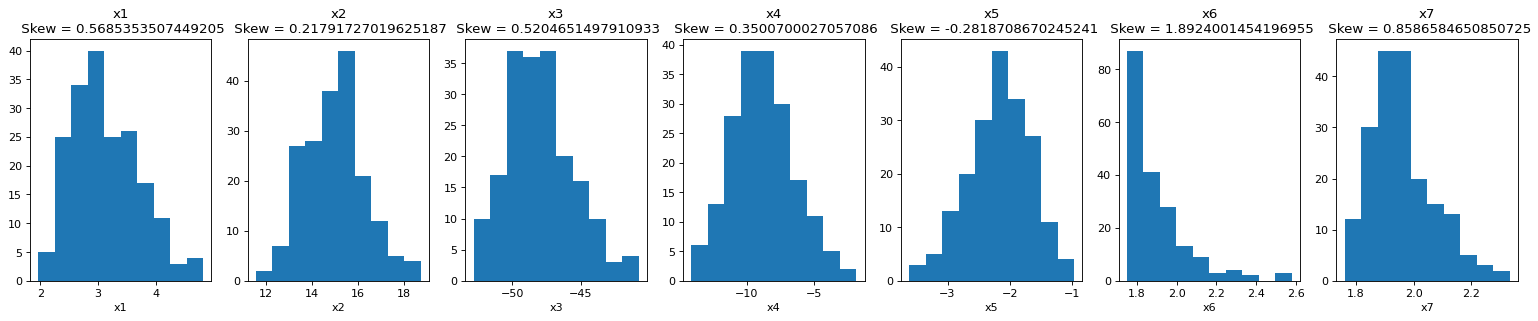

In [ ]:
plt.figure(figsize=(24, 4), dpi=80)
cols_to_transform = []
i=1
for col in X.columns.values:
  colSkew = X[col].skew()
  pltTitle = col + '\n Skew = ' + str(X[col].skew())
  plt.subplot(1, len(X.columns), i).set_title(pltTitle)
  i = i+1
  plt.hist(X[col])
  plt.xlabel(col)
  if (abs(colSkew) > 0.6):
    cols_to_transform.append(col)
  #print(col + ': Skew = ', X[col].skew())

plt.show()

# Feature-scaling

In [ ]:
#Initialize our scaler
scaler = StandardScaler()

In [ ]:
#Scale each column in numer
X = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
X.head()

,0,1,2,3,4,5,6
0,-0.893531,0.214228,0.660423,-0.935894,-0.180173,0.263020,0.750311
1,-0.043014,-0.155081,-0.108467,0.005283,-0.089272,-0.268499,-0.334918
2,0.406310,-0.162711,-0.636915,-0.093875,0.823388,-0.884520,0.771011
3,-1.543484,0.032201,1.919837,-2.039160,-0.926059,1.924996,1.692138
4,0.471557,0.100418,-0.614413,0.838262,0.297131,-0.664890,-0.762999


# Train KPCA

In [ ]:
from sklearn.decomposition import PCA, KernelPCA

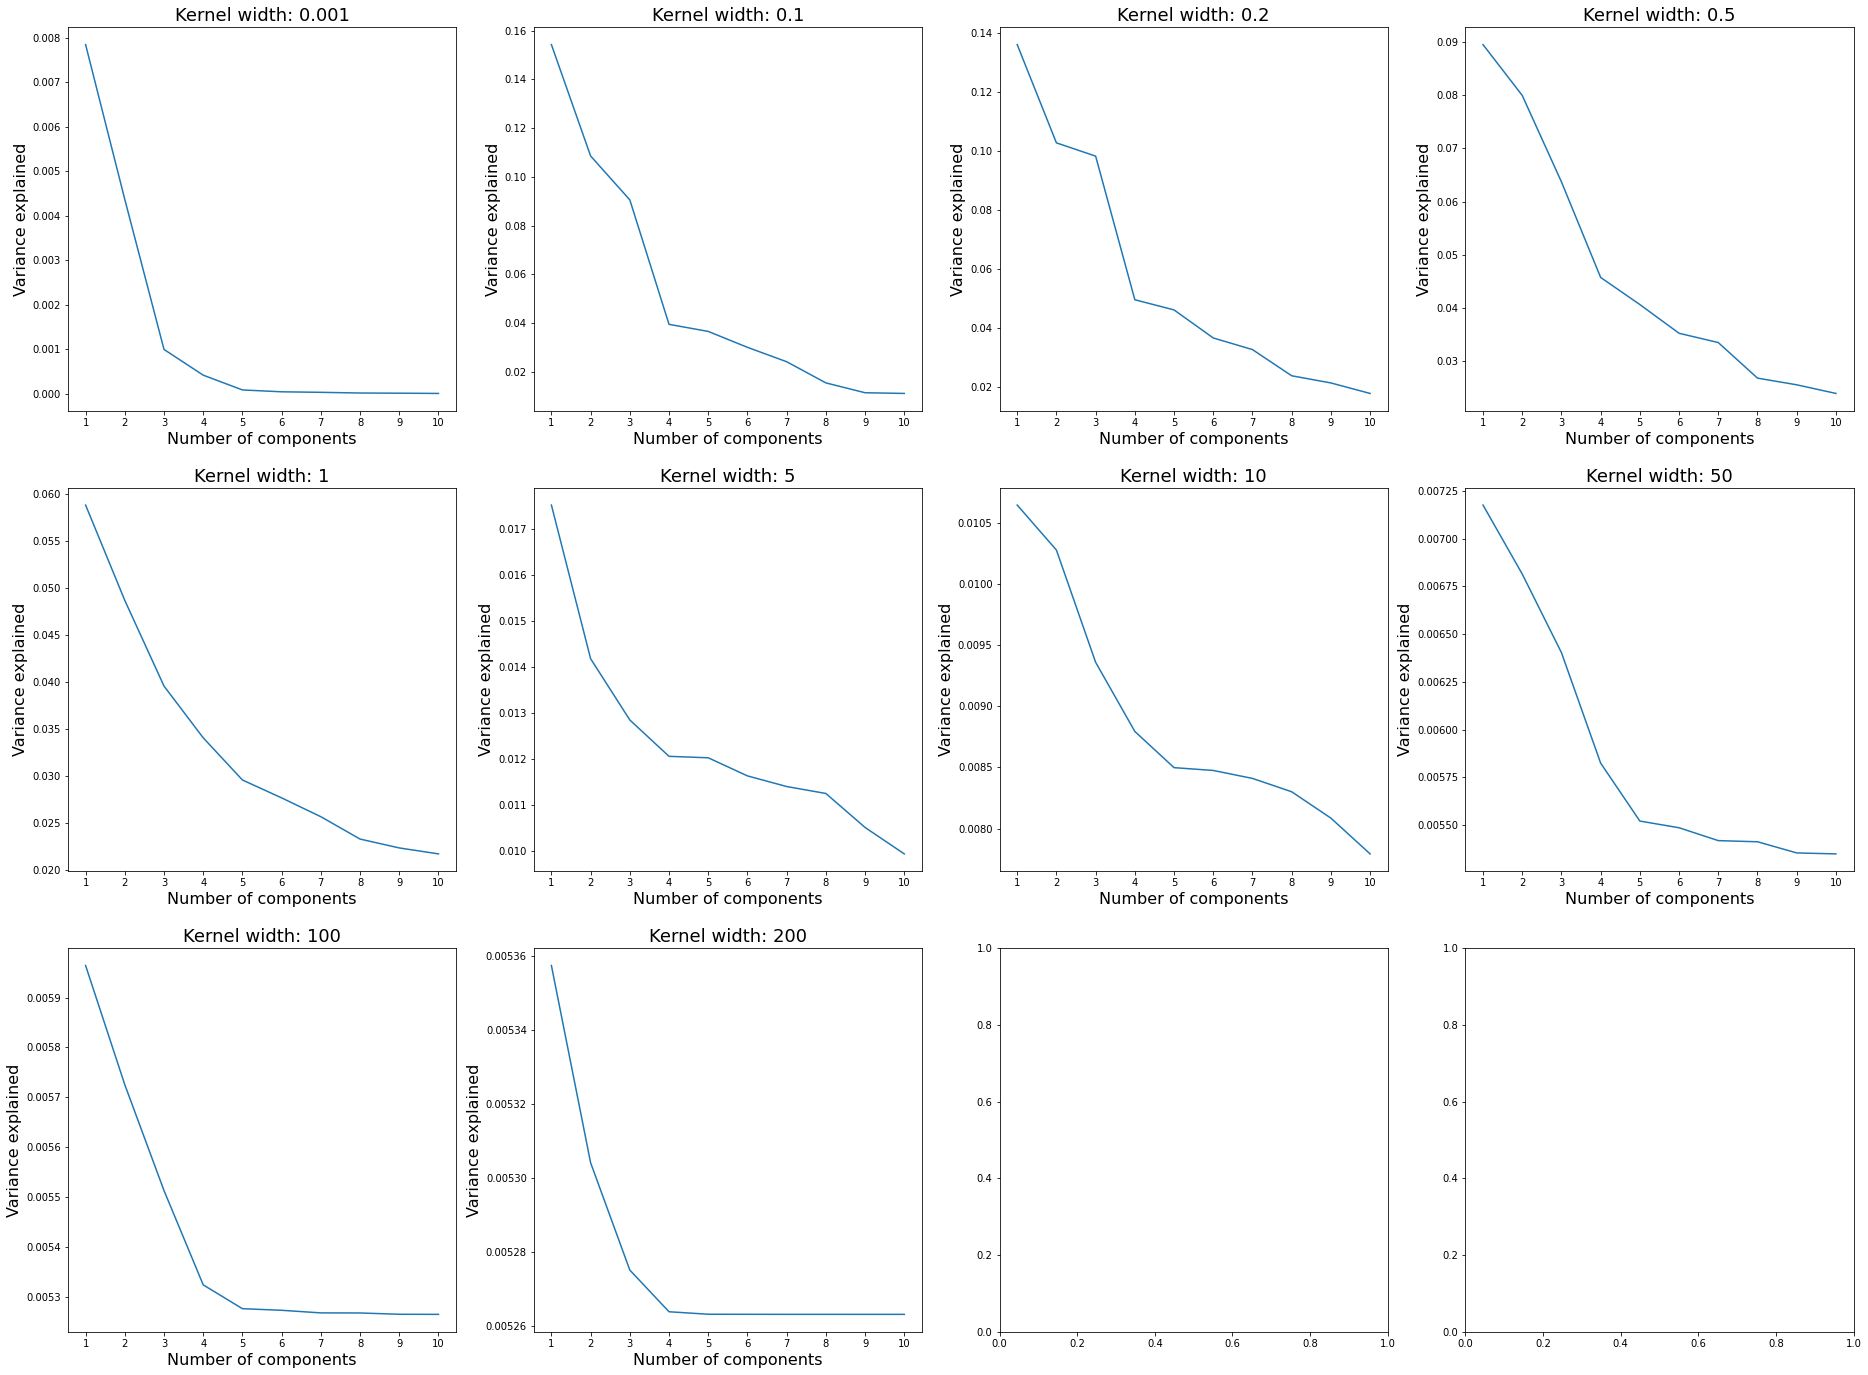

In [ ]:
gamma_arr = [0.001,0.1,0.2,0.5,1,5,10,50,100,200] # for different kernel widths

ncols = 4 # number of columns in subplots grid
nrows = int(np.ceil(len(gamma_arr)/ncols)) # number of rows in subplots grid
fig, axs = plt.subplots(nrows, ncols)
fig.set_figheight(8*nrows)
fig.set_figwidth(8*ncols)

for i in range(len(gamma_arr)):
  # train KPCA
  kernel_pca = KernelPCA(n_components=None, kernel="rbf", gamma=gamma_arr[i], fit_inverse_transform=True, alpha=0.1)
  X_kernel_pca = kernel_pca.fit_transform(X)
  explained_variance = np.var(X_kernel_pca, axis=0) #https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

  # plot variance explained vs no. of components
  axs[int(i/ncols),i%ncols].plot(np.arange(1,11),explained_variance[0:10])
  axs[int(i/ncols),i%ncols].set_xlabel('Number of components',fontsize=16)
  axs[int(i/ncols),i%ncols].set_ylabel('Variance explained',fontsize=16)
  axs[int(i/ncols),i%ncols].set_xticks(np.arange(1,11))
  axs[int(i/ncols),i%ncols].set_title('Kernel width: ' + str(gamma_arr[i]),fontsize=18)

plt.show()

https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.subplot.html

https://stackoverflow.com/questions/29611842/scikit-learn-kernel-pca-explained-variance

https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
